In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Data
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


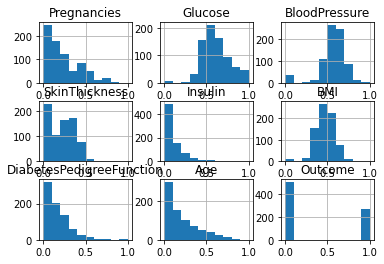

In [81]:
df.hist()
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Adding Features and Outcome

In [7]:
#feature
feat = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

#target
target = ['Outcome']


In [9]:
print(df.shape)

(768, 9)


## EDA

In [10]:
# Range Normalization/ Standardization
# We Normalize the Data using the formula of Norm = X - Xmin/ Xmax - Xmin
# Implement the formula in using python.
for f in df:
    sc = df.sort_values(f)
    x_max = sc[f].iloc[-1]
    x_min = sc[f].iloc[0]
    x_range = x_max - x_min
    
    for i in range(df.shape[0]):
        df.loc[i,f] = (df[f][i] - x_min)/x_range

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


# Building Neural Network

## Spliting the Data

In [73]:
# Split the Data into training and testing Dataset
# Divide the data into 90,10 (90 percent training data, 10 percent testing data)
train = df.loc[ :(768*90//100)]
test = df.loc[(768*90//100+1): ]


x_train, y_train =  train[feat].values, train[target].values
x_test, y_test = test[feat].values, test[target].values
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(692, 7) (692, 1)
(76, 7) (76, 1)


## Building a Perceptron Model

In [74]:

# Making Predictions with Weight
# Defining a Predict Function

def predict(r,w):
    activation = w[0]
    for i in range(len(r) - 1):
        activation += w[i+1] * r[i]
    return 1 if activation >0 else 0

In [75]:
## Estimate Perceptron weights using Stochastic Gradient Descent

def train_weights(tr,l_rate,n_epoch):
    w = [0 for i in range(len(tr[0]))]  #weights[0] is bias
    
    for e in range(n_epoch):
        cummulative_error = 0
        
        for r in tr:
            prediction = predict(r,w)
            error = r[-1] - prediction
            cummulative_error += error**2
            w[0] = w[0] + l_rate*error
            
            for i in range(len(r) - 1):
                w[i + 1]  = w[i+1] + l_rate*error*r[1]
            
    return w

In [76]:
## Perceptron Algorithm with Stochastic Gradient Descent

def perceptron(tr,te,l_rate,n_epoch):
    predictions = list()
    w = train_weights(tr,l_rate,n_epoch)
    
    for r in te:
        prediction = predict(r,w)
        predictions.append(prediction)
    
    return predictions



In [133]:
# Defining Learning Rate and number of epochs


l_rate = 0.1
n_epochs = 90
predicted = perceptron(train.values, test.values,l_rate,n_epochs)

for i in range(25):
        print(f'Predicted: {predicted[i]}, Actual:{y_test[i][0]}')

Predicted: 0, Actual:0
Predicted: 1, Actual:1
Predicted: 0, Actual:0
Predicted: 1, Actual:1
Predicted: 0, Actual:1
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 1, Actual:1
Predicted: 1, Actual:1
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 0, Actual:1
Predicted: 0, Actual:0
Predicted: 1, Actual:1
Predicted: 0, Actual:1
Predicted: 0, Actual:0
Predicted: 1, Actual:0
Predicted: 1, Actual:1
Predicted: 0, Actual:0
Predicted: 0, Actual:0
Predicted: 1, Actual:1
Predicted: 1, Actual:1


# Predict Accuracy

In [134]:
## Predict the Accuracy 
def accuracy_metric(act, predicted):
    correct = 0
    for i in range(len(act)):
        if act[i][0] == predicted[i]:
            correct += 1
    return correct / float(len(act)) * 100.0

accuracy = accuracy_metric(y_test,predicted)


In [135]:
# Calculate precision percentage
def precision_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i][0] == 1 and predicted[i] == 1:
            correct += 1
    return correct / predicted.count(1) * 100.0

precision = precision_metric(y_test,predicted)


In [136]:
# Calculate recall percentage
def recall_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i][0] == 1 and predicted[i] == 1:
            correct += 1
    return correct / test[test['Outcome'] == 1].shape[0] * 100.0

recall = recall_metric(y_test,predicted)


In [137]:
# Print Accuracy, Precision and Recall
print(f'Accuracy = {round(accuracy,2)}')
print(f'Precision = {round(precision,2)}')
print(f'Recall = {round(recall,2)}')

Accuracy = 73.68
Precision = 67.86
Recall = 63.33
